In [2]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

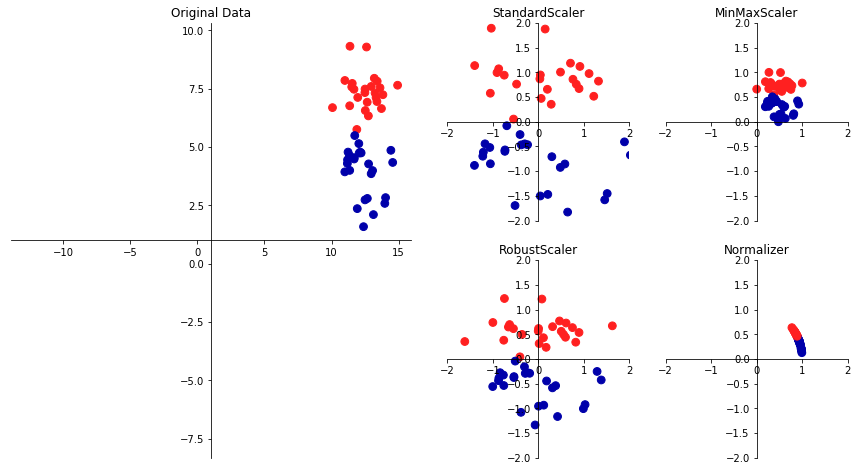

In [3]:
mglearn.plots.plot_scaling()

StandardScaler:平均0分散1となるように変換する<br>
RobustScaler:個々の特徴量が一定の範囲に入るように変換する。平均値と分散の代わりに中央値と四分位数を用いる。このため外れ値は無視される<br>
MinMaxScaler:データが0～1の間を取るようにスケーリングする<br>
Normalizer:データポイントが半径1の円に投射する。つまりデータポイントごとに異なったスケーリングがされる

In [7]:
cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

訓練データをスケール変換するにはスケール変換器のtransformメソッドを用いる<br>
モデルが新しいデータ表現を返す際にはtransformメソッドが用いられる

In [11]:
X_train_scaled = scaler.transform(X_train)

print("transformed shape:{}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n{}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n{}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n{}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_train_scaled.max(axis=0)))

transformed shape:(426, 30)
per-feature minimum before scaling:
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


MinMaxScalerなので各特徴量で0～1の範囲内に収まっていることがわかる<br>
次に検証データにも適用してみる

In [13]:
X_test_scaled = scaler.transform(X_test)

print("transformed shape:{}".format(X_test_scaled.shape))
print("per-feature minimum before scaling:\n{}".format(X_test.min(axis=0)))
print("per-feature maximum before scaling:\n{}".format(X_test.max(axis=0)))
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

transformed shape:(143, 30)
per-feature minimum before scaling:
[7.691e+00 1.038e+01 4.834e+01 1.704e+02 6.828e-02 3.116e-02 0.000e+00
 0.000e+00 1.365e-01 4.996e-02 1.115e-01 3.871e-01 8.484e-01 7.228e+00
 2.866e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 1.087e-03 8.678e+00
 1.420e+01 5.449e+01 2.236e+02 8.774e-02 5.131e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
per-feature maximum before scaling:
[2.722e+01 3.381e+01 1.821e+02 2.250e+03 1.425e-01 3.454e-01 3.754e-01
 1.878e-01 2.906e-01 9.744e-02 1.292e+00 2.612e+00 1.012e+01 1.587e+02
 1.604e-02 1.006e-01 3.038e-01 3.322e-02 7.895e-02 1.220e-02 3.312e+01
 4.178e+01 2.208e+02 3.216e+03 2.098e-01 1.058e+00 1.252e+00 2.688e-01
 6.638e-01 2.075e-01]
per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05

訓練データを基準にスケーリングしたため、同じスケーリングを使用すると検証データは0～1に収まるとは限らない

### 訓練データ、検証データを同じようにスケーリングする

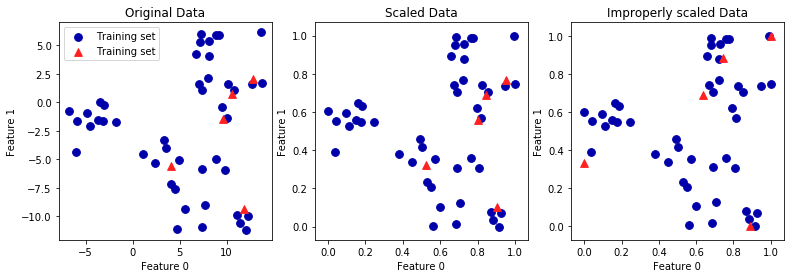

In [18]:
from sklearn.datasets import make_blobs
#合成データを作成
X, _ = make_blobs(n_samples=50,centers=5,random_state=4,cluster_std=2)
X_train,X_test = train_test_split(X,random_state=5,test_size=.1)

#訓練セットと検証セットをプロット
fig,axes = plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],c=mglearn.cm2(0),label="Training set",s=60)
axes[0].scatter(X_test[:,0],X_test[:,1],marker='^',c=mglearn.cm2(1),label="Training set",s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2(0),label="Training set",s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],marker='^',c=mglearn.cm2(1),label="Training set",s=60)
axes[1].set_title("Scaled Data")

#訓練セットと検証セットを別々にスケーリング
#以下はやってはいけない（説明のために記載）
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],c=mglearn.cm2(0),label="Training set",s=60)
axes[2].scatter(X_test_scaled_badly[:,0],X_test_scaled_badly[:,1],marker='^',c=mglearn.cm2(1),label="Training set",s=60)
axes[2].set_title("Improperly scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")


左はオリジナルデータ、中央は正しいスケーリング、右は誤ったスケーリング<br>
右は訓練セット、検証セットそれぞれでスケーリングを行っている<br>
左と中央はデータの位置関係は変わっていない<br>
右は明らかにオリジナルデータと位置関係が変わっており、データが改変されている。これはいけない<br>

In [19]:
#楽なやりかた
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#以下の2行は同じことを行っている
X_scaled = scaler.fit(X).transform(X)
X_scaled_d = scaler.fit_transform(X)

### 前処理の効果

In [21]:
from sklearn.svm import SVC

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

svm = SVC(C=100)
svm.fit(X_train,y_train)
print("Test set accuracy:{:.2f}".format(svm.score(X_test,y_test)))

Test set accuracy:0.63


精度63%となった。次にスケーリングしてみる

In [23]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled,y_train)
print("Test set accuracy:{:.2f}".format(svm.score(X_test_scaled,y_test)))

Test set accuracy:0.97


スケーリングをおこなっただけで性能が大幅に向上したことがわかる